In [1]:
# PyThorch - To create the neural network
# matplotlib & seaborn to drow graphs

In [1]:
import torch # Used to crate tensor to storer all of the numerical values including the raw data
import torch.nn as nn # Used to make the weights and bias tensor part of the neural network
import torch.nn.functional as F # this gives us the activation functions
from torch.optim import SGD # stochastic gradient descent to fit the neural network to the data

In [2]:
!pip install lightning

In [3]:
import lightning as L
from torch.utils.data import TensorDataset, DataLoader ## to handler large datasets

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns # (sns Samual Norman SEABORN)

In [5]:
# create our NN class to herdar da L.LightningModule)

class BasicLightning(L.LightningModule):
    def __init__(self): # initialization methods for the class
        super().__init__() # call the initialization methods for the parent nn.Module class

         # Initialize the weights and biases in our neural network
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad=False)

    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_botton_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_botton_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return output

In [57]:
input_doses = torch.linspace(start=0, end=1, steps=11)
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [58]:
model = BasicLightning()

In [59]:
output_values = model(input_doses)
output_values

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0100, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000])

Text(0.5, 0, 'Dose')

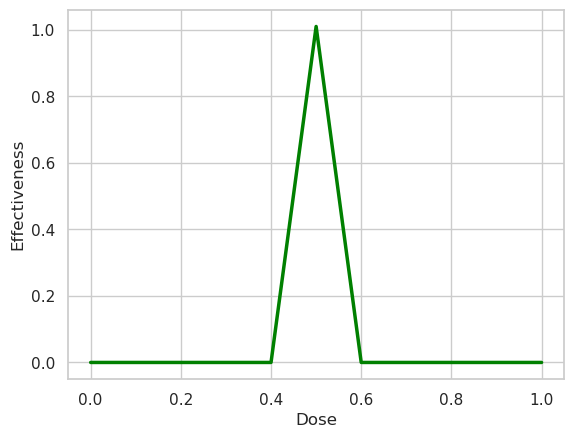

In [60]:
# ploting the graph
sns.set(style="whitegrid")
sns.lineplot(x=input_doses,
             y=output_values,
             color='green',
             linewidth=2.5)

plt.ylabel('Effectiveness')
plt.xlabel('Dose')

In [5]:
# create our NN class to herdar da L.LightningModule)

class BasicLightningTrain(L.LightningModule):
    def __init__(self): # initialization methods for the class
        super().__init__() # call the initialization methods for the parent nn.Module class

         # Initialize the weights and biases in our neural network
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(0.0), requires_grad=True)
        self.learning_rate =0.01

    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_botton_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_botton_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return output

    def configure_optimizers(self):
        return SGD(self.parameters(), lr=self.learning_rate)

    def training_step(self, batch, batch_idx):
        input_i, label_i = batch
        output_i = self.forward(input_i)
        loss = (output_i - label_i)**2
        return loss

In [7]:
model = BasicLightningTrain()

In [11]:
#output_values = model(input_doses)
#output_values

Text(0.5, 0, 'Dose')

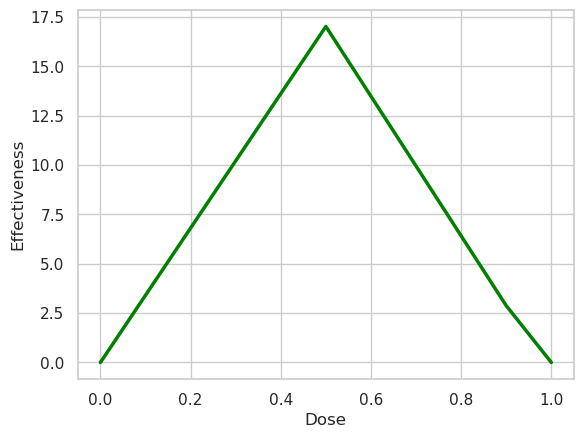

In [65]:
# Ploting the graph
sns.set(style = "whitegrid")
sns.lineplot(x = input_doses,
             y = output_values.detach(), # tirar o valor dos pesos treinos do tensor
             color = 'green',
             linewidth = 2.5)

plt.ylabel('Effectiveness')
plt.xlabel('Dose')

In [ ]:
## treinar a rede toda
inputs = torch.tensor([0., 0.5, 1.])
labels = torch.tensor([0., 1.0, 0.])

dataset = TensorDataset(inputs, labels)
dataloader = DataLoader(dataset)

model = BasicLightningTrain()

#  accelerator : The accelerator to use for training. Can be one of "cpu", "gpu", "tpu", "ipu", "auto".
trainer = L.Trainer(max_epochs=34, accelerator="cpu")
tuner = L.pytorch.tuner.Tuner(trainer)

lr_find_results = tuner.lr_find(model, train_dataloaders=dataloader, min_lr=0.01, max_lr=1.0, early_stop_threshold=None)
lr_find_results.suggestion()


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [2]:
trainer.fit(model, train_dataloaders=dataloader)
print(model.final_bias)

NameError: name 'trainer' is not defined